<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_09_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
#from common.optimizer import *

In [165]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

In [166]:
class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [167]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr #η
        self.momentum = momentum #α
        self.v = None

    def update(self, params, grads):
	# update()가 처음 호출될 때 v에 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [168]:
class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            # 0으로 나누는 일이 없도록 1e-7을 더해줍니다. 이 값은 임의로 지정 가능합니다.

In [169]:
class RMSprop:

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [170]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

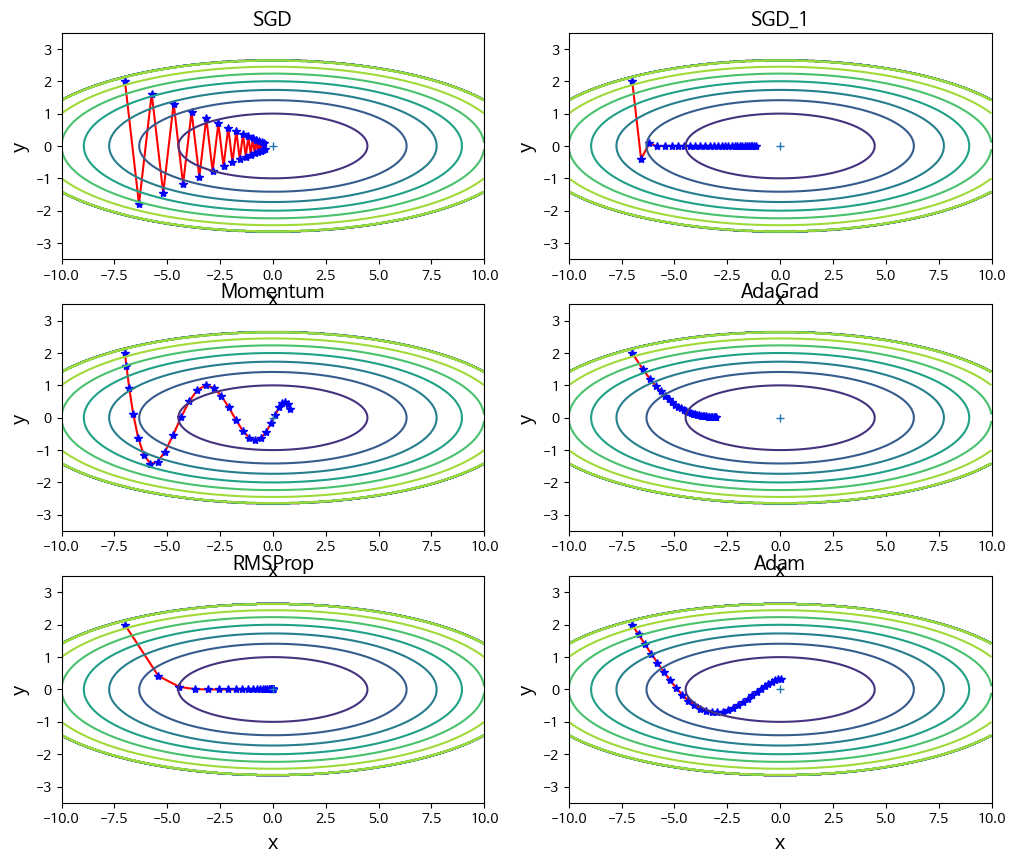

In [191]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["SGD_1"] = SGD(lr=0.6)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=0.5)
optimizers["RMSProp"] = RMSprop(lr=0.5, decay_rate = 0.9)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

plt.figure(figsize=(12,10))

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)


    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, '-', color="red")
    plt.plot(x_history, y_history, '*', color="blue")
    plt.contour(X, Y, Z)
    plt.ylim(-3.5, 3.5)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

In [172]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

# 추가 코드 - 패션 MNIST에서 옵티마이저를 테스트하는 간단한 함수

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [173]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [174]:
history_sgd = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7250 - accuracy: 0.7511 - val_loss: 0.5297 - val_accuracy: 0.8042
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4749 - accuracy: 0.8325 - val_loss: 0.4620 - val_accuracy: 0.8306
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4292 - accuracy: 0.8485 - val_loss: 0.4128 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4011 - accuracy: 0.8574 - val_loss: 0.3919 - val_accuracy: 0.8572
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8655 - val_loss: 0.3732 - val_accuracy: 0.8638
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3665 - accuracy: 0.8689 - val_loss: 0.3709 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3498 - accuracy: 0.8743 - val_loss: 0.3736 - val_accuracy:

In [175]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7003 - accuracy: 0.7580 - val_loss: 0.5158 - val_accuracy: 0.8170
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4674 - accuracy: 0.8344 - val_loss: 0.4490 - val_accuracy: 0.8348
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4234 - accuracy: 0.8488 - val_loss: 0.4040 - val_accuracy: 0.8544
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3962 - accuracy: 0.8599 - val_loss: 0.3920 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8660 - val_loss: 0.3761 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3616 - accuracy: 0.8718 - val_loss: 0.3706 - val_accuracy: 0.8622
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3447 - accuracy: 0.8757 - val_loss: 0.3730 - val_accuracy:

In [176]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True)
history_nesterov = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6841 - accuracy: 0.7652 - val_loss: 0.4884 - val_accuracy: 0.8258
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4627 - accuracy: 0.8386 - val_loss: 0.4493 - val_accuracy: 0.8344
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4222 - accuracy: 0.8521 - val_loss: 0.4009 - val_accuracy: 0.8564
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3962 - accuracy: 0.8614 - val_loss: 0.3879 - val_accuracy: 0.8608
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3767 - accuracy: 0.8674 - val_loss: 0.3709 - val_accuracy: 0.8640
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3632 - accuracy: 0.8723 - val_loss: 0.3892 - val_accuracy: 0.8594
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3480 - accuracy: 0.8758 - val_loss: 0.3789 - val_accuracy:

In [177]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9851 - accuracy: 0.6905 - val_loss: 0.6678 - val_accuracy: 0.7840
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6228 - accuracy: 0.8000 - val_loss: 0.5721 - val_accuracy: 0.8158
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5584 - accuracy: 0.8173 - val_loss: 0.5307 - val_accuracy: 0.8236
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5251 - accuracy: 0.8271 - val_loss: 0.5087 - val_accuracy: 0.8284
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5032 - accuracy: 0.8331 - val_loss: 0.4906 - val_accuracy: 0.8324
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4872 - accuracy: 0.8367 - val_loss: 0.4798 - val_accuracy: 0.8330
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4746 - accuracy: 0.8401 - val_loss: 0.4686 - val_accuracy:

In [178]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5194 - accuracy: 0.8129 - val_loss: 0.4489 - val_accuracy: 0.8248
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3933 - accuracy: 0.8585 - val_loss: 0.4380 - val_accuracy: 0.8480
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3692 - accuracy: 0.8675 - val_loss: 0.4183 - val_accuracy: 0.8578
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3608 - accuracy: 0.8736 - val_loss: 0.3970 - val_accuracy: 0.8708
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3540 - accuracy: 0.8768 - val_loss: 0.4139 - val_accuracy: 0.8558
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3491 - accuracy: 0.8787 - val_loss: 0.4333 - val_accuracy: 0.8674
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3485 - accuracy: 0.8789 - val_loss: 0.3993 - val_accuracy:

In [179]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_adam = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5076 - accuracy: 0.8173 - val_loss: 0.4463 - val_accuracy: 0.8252
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3756 - accuracy: 0.8618 - val_loss: 0.4026 - val_accuracy: 0.8414
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3406 - accuracy: 0.8733 - val_loss: 0.3409 - val_accuracy: 0.8692
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3170 - accuracy: 0.8834 - val_loss: 0.3300 - val_accuracy: 0.8794
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2977 - accuracy: 0.8887 - val_loss: 0.3188 - val_accuracy: 0.8788
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2851 - accuracy: 0.8932 - val_loss: 0.3416 - val_accuracy: 0.8756
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2717 - accuracy: 0.8985 - val_loss: 0.3516 - val_accuracy:

In [180]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_adamax = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5439 - accuracy: 0.8119 - val_loss: 0.4557 - val_accuracy: 0.8334
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4016 - accuracy: 0.8569 - val_loss: 0.3944 - val_accuracy: 0.8520
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3637 - accuracy: 0.8693 - val_loss: 0.3682 - val_accuracy: 0.8718
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3377 - accuracy: 0.8789 - val_loss: 0.3534 - val_accuracy: 0.8696
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3170 - accuracy: 0.8845 - val_loss: 0.3312 - val_accuracy: 0.8770
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8901 - val_loss: 0.3257 - val_accuracy: 0.8758
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2885 - accuracy: 0.8946 - val_loss: 0.3367 - val_accuracy:

In [181]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_nadam = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.4809 - accuracy: 0.8300 - val_loss: 0.4102 - val_accuracy: 0.8430
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3649 - accuracy: 0.8681 - val_loss: 0.3940 - val_accuracy: 0.8530
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3313 - accuracy: 0.8783 - val_loss: 0.3425 - val_accuracy: 0.8742
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3083 - accuracy: 0.8862 - val_loss: 0.3452 - val_accuracy: 0.8738
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2898 - accuracy: 0.8921 - val_loss: 0.3178 - val_accuracy: 0.8790
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2762 - accuracy: 0.8981 - val_loss: 0.3516 - val_accuracy: 0.8778
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2645 - accuracy: 0.8991 - val_loss: 0.3384 - val_accuracy

In [182]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

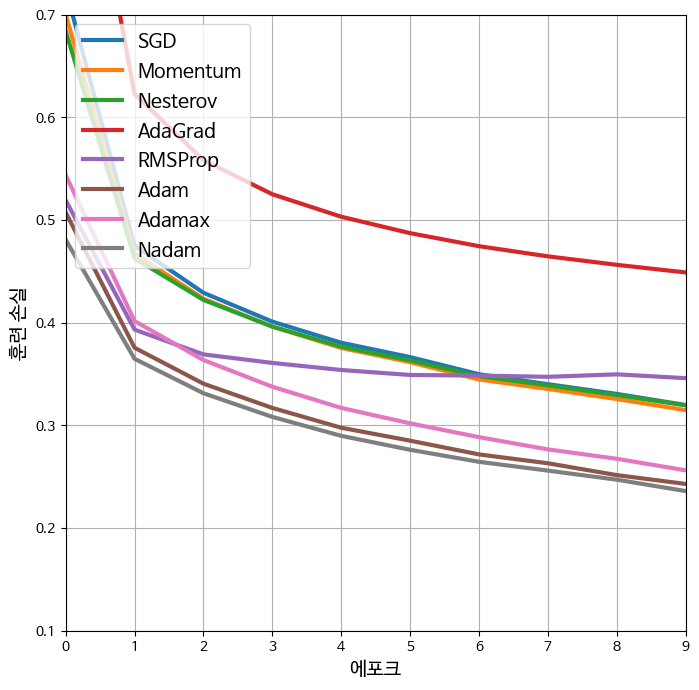

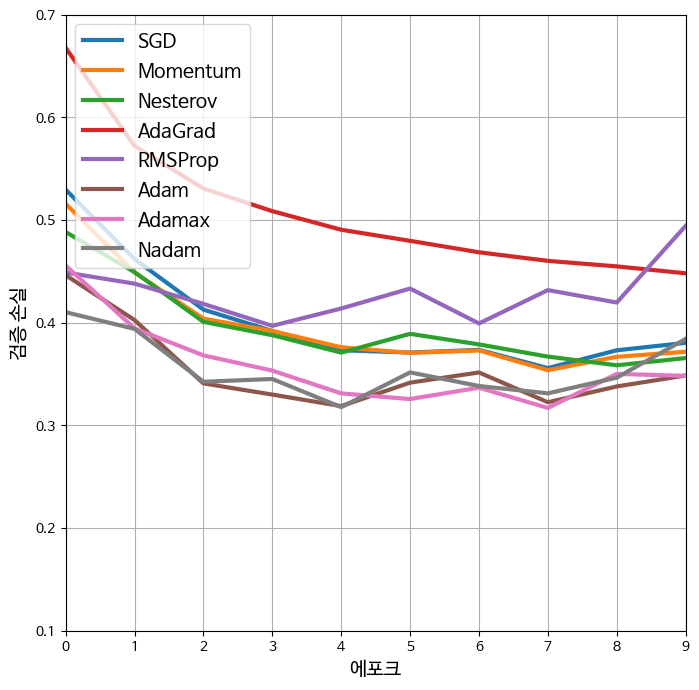

In [183]:
# 추가 코드 - 모든 옵티마이저의 학습 곡선 시각화

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(8, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("에포크")
    plt.ylabel({"loss": "훈련 손실", "val_loss": "검증 손실"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()